In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data=pd.read_csv("/content/innings_deliveries.csv")
data

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


In [4]:
data.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]


In [5]:
data.tail()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
246,Delhi Capitals,19,Kuldeep Yadav,Yash Dayal,I Sharma,0,0,0,Kuldeep Yadav,bowled,[]


In [6]:
#data preperation for run distribution per over
#for the sport related data always find distribution for eg. for cricket in case of cricket, to find run distribution per over we have to aggregate total runs over the sum.
#and reset the index of remaining column , now this will give exact run distribution inn terms of line plot.
run_distribution = data.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()

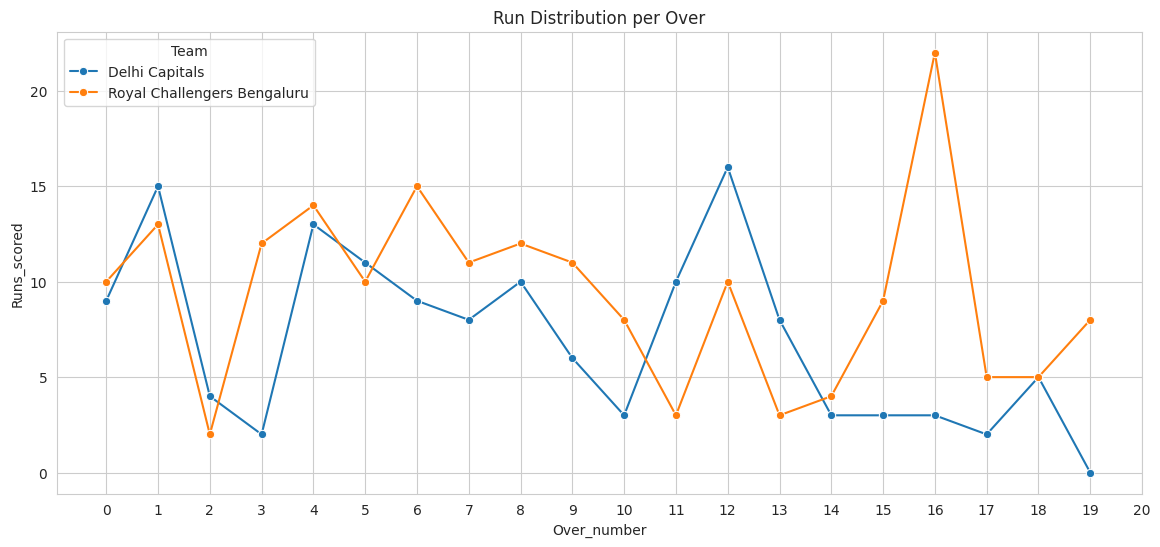

In [7]:
#plotting run disribution per over both distribution
plt.figure(figsize=(14, 6))
sns.lineplot(x='over', y='runs_total', hue='team', data=run_distribution,marker="o")
plt.title('Run Distribution per Over')
plt.xlabel('Over_number')
plt.ylabel('Runs_scored')
plt.xticks(range(0, 21))
plt.legend(title='Team')
plt.show()

In [8]:
#1.the scoring rate for each team shows the fluctuations throughout their innings , with spikes indicating overs with high scoring , likely due to fours or sixes.
#2.RCB appears to have couple of overs with significantly high runs.

In [9]:
#now we will analyze top scorers from each team to highlight individual performances.

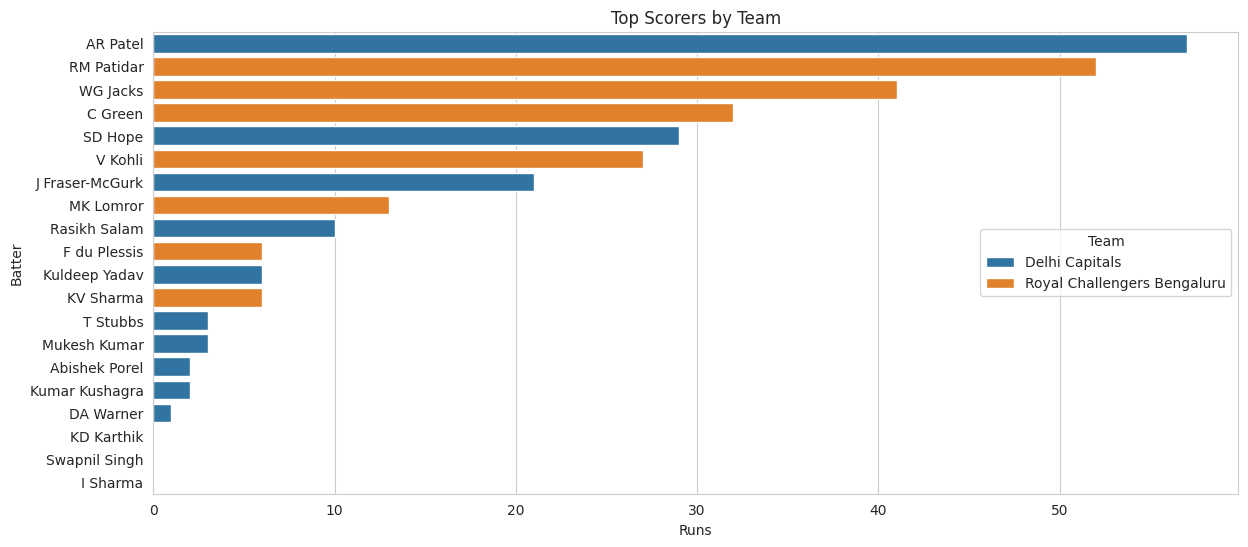

In [10]:
top_scorers = data.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(data=top_scorers,x="runs_batter",y="batter",hue="team",dodge=False)
plt.title("Top Scorers by Team")
plt.xlabel("Runs")
plt.ylabel("Batter")
plt.legend(title="Team",loc='center right')
plt.show()

AR Patel from Delhi Capitals is the top scorer of the match, significantly outscoring others with a little over 50 runs.
RM Patidar is the top scorer for Royal Challengers Bangalore, closely approaching 50 runs.
The graph displays a diverse contribution from both teams, with several players from both sides contributing notable scores.

In [11]:
#A dodged bar plot is used to compare a grouping variable, where the groups are plotted side by side. It could be used to compare categorical counts or relative proportions, and in general used to compare numerical statistics such as mean/median.

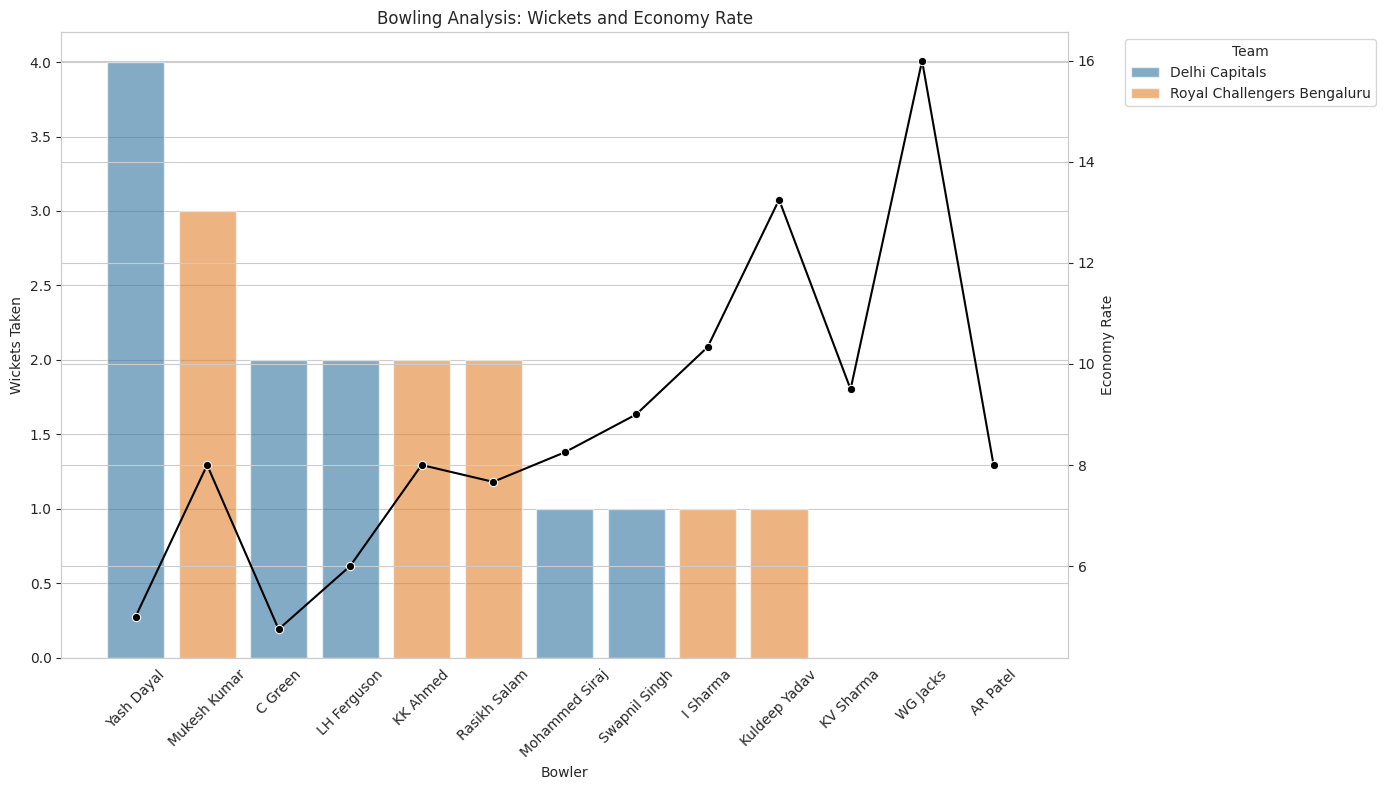

In [12]:
# preparing data for bowling analysis
data['wickets_taken'] = data['wicket_kind'].notna().astype(int)
bowling_stats = data.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()

# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']

# sorting the data for better visualization
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# prepare the DataFrame for plotting
bowling_stats_sorted['wickets_taken'] = data['wicket_kind'].notna().astype(int)
bowling_stats = data.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for wickets
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

The bbox_to_anchor parameter specifies the legend's position. The tuple (1.05, 1) positions the legend just outside the plot's right edge. The loc parameter determines where the legend's anchor point should be. 'upper left' means the upper left corner of the legend will be at the position specified by bbox_to_anchor

Wickets Taken: The bars indicate the number of wickets each bowler took during the match. The height of the bars reflects how successful the bowlers were in terms of taking wickets. Bowlers from both teams contributed to taking wickets, with some notable performances that stand out due to higher bars.

Economy Rate: The line graph overlaid on the bar graph shows the economy rate (number of runs conceded per over) of each bowler. The economy rate is crucial as it indicates how economically a bowler has bowled in terms of runs given away.

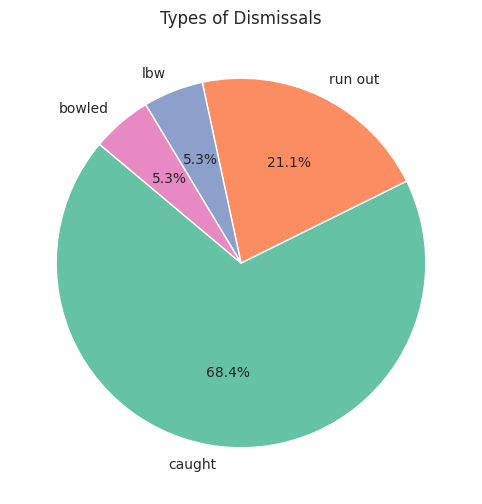

In [13]:
#let’s analyze the types of dismissals that occurred during the match to understand how most wickets were taken (e.g., #caught, bowled, run out). This can provide insights into the nature of the pitch and the playing conditions. We’ll visualize #this using a pie chart
# counting dismissal types
dismissal_types = data['wicket_kind'].dropna().value_counts()

plt.figure(figsize=(8, 6))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.show()

In [14]:
#most productive batting partnerships in the match

In [15]:
#Partnerships Analysis by calculating and visualizing the most productive batting partnerships in the match.
#function to calculate partnerships
def calculate_partnerships(data):
  partnerships = []
